In [1]:
cd


C:\Users\M0144771


In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [9]:
dataset = pd.read_csv('HR_comma_sep.csv')


In [10]:
dataset.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
dataset.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [12]:
#in describe we get alot of info about the data. So spend some time here.
#satisfaction level we get count which is same for all. Then we get mean. Std dev which tell what is the distance from the mean
#what is the min value and what is the value of 25% to 75% like 25% value is 0.44 and .82 is the 75% value. even what is the max for each data header


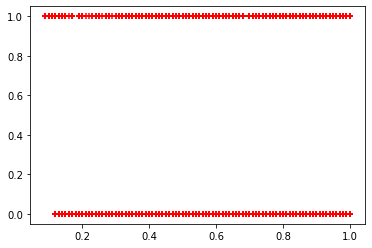

In [16]:
plt.scatter(dataset.satisfaction_level, dataset.left,marker = '+', color ='red')


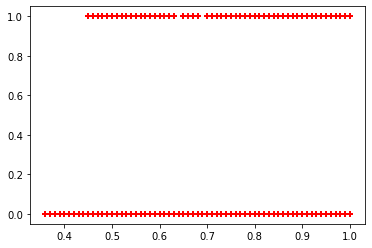

In [17]:
plt.scatter(dataset.last_evaluation, dataset.left,marker = '+', color ='red')

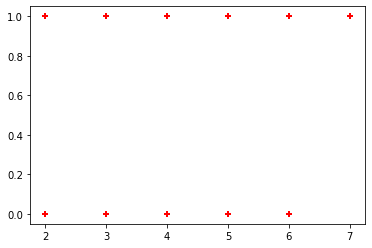

In [18]:
plt.scatter(dataset.number_project, dataset.left,marker = '+', color ='red')

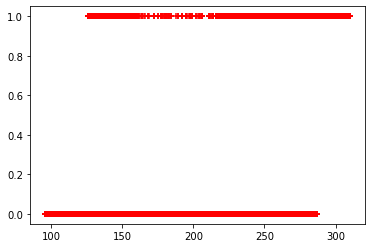

In [19]:
plt.scatter(dataset.average_montly_hours, dataset.left,marker = '+', color ='red')

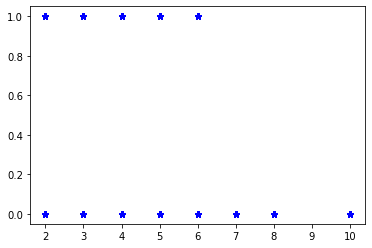

In [20]:
plt.scatter(dataset.time_spend_company,dataset.left,marker = '*', color = 'blue')

In [21]:
#lets start with data exploration and visualization
left = dataset[dataset.left ==1] #herer we redefine left and we assign left = 1 
left.shape

(3571, 10)

In [22]:
retained = dataset[dataset.left==0]
retained.shape


(11428, 10)

In [24]:
dataset.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [25]:
#satisfaction level high thus retention, average monthly hours are high the employee left, promotions last 5 years given retained

<AxesSubplot:xlabel='salary'>

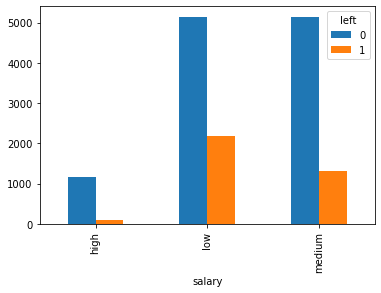

In [29]:
#now as salary is not in numbers thus we define the effect of salary on employee retention
pd.crosstab(dataset.salary,dataset.left).plot(kind ='bar')
#The pandas crosstab function builds a cross-tabulation table that can show the frequency with which 
#certain groups of data appear

<AxesSubplot:xlabel='Department'>

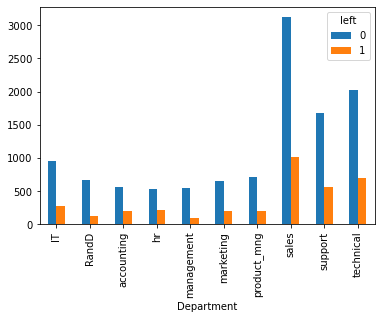

In [30]:
pd.crosstab(dataset.Department,dataset.left).plot(kind = 'bar')
#from below analysis we see there is some impact on the emp retention of department but it is negligble hence we neglect it

In [35]:
#from the above data analysis we conclude that satisfaction level, average monthly hours, promotion last 5 years and salary
#are the independent variables 
#so we create a subset of these variables
s_data = dataset[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
s_data.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [36]:
#as we can see salary is the text and all are numbers. we create dummy for salary
sal_dum = pd.get_dummies(s_data.salary,prefix = 'salary')

In [39]:
data_dum = pd.concat([s_data,sal_dum], axis ='columns')
data_dum.head

<bound method NDFrame.head of        satisfaction_level  average_montly_hours  promotion_last_5years  \
0                    0.38                   157                      0   
1                    0.80                   262                      0   
2                    0.11                   272                      0   
3                    0.72                   223                      0   
4                    0.37                   159                      0   
...                   ...                   ...                    ...   
14994                0.40                   151                      0   
14995                0.37                   160                      0   
14996                0.37                   143                      0   
14997                0.11                   280                      0   
14998                0.37                   158                      0   

       salary  salary_high  salary_low  salary_medium  
0         low            

In [40]:
#now we drop the salary as we have got the dummy
data_dum.drop('salary', axis = 'columns', inplace = True)
data_dum.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [41]:
X= data_dum
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [42]:
y = dataset.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,train_size=0.3)

In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [47]:
#now we train the model
model.fit(X_train,y_train)

LogisticRegression()

In [51]:
z = model.predict(X_test)

In [49]:
model.score(X_test,y_test)

0.7808571428571428

In [50]:
X_test

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
2074,0.45,111,0,0,1,0
11192,0.91,235,0,0,1,0
2626,0.89,194,0,0,1,0
13503,0.29,187,0,1,0,0
9231,0.71,157,0,0,0,1
...,...,...,...,...,...,...
409,0.82,233,0,0,1,0
2684,0.61,174,0,0,0,1
3641,0.17,216,0,0,0,1
6777,0.59,192,0,0,1,0


In [52]:
z

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [53]:
model.predict_proba(X_test)

array([[0.68458568, 0.31541432],
       [0.87926195, 0.12073805],
       [0.88548052, 0.11451948],
       ...,
       [0.48652721, 0.51347279],
       [0.73235494, 0.26764506],
       [0.85088203, 0.14911797]])

In [56]:
z = model.predict(X_test)

In [59]:
plt.figure(figsize=[12,8])
plt.scatterplot(y_test, z)

AttributeError: module 'matplotlib.pyplot' has no attribute 'scatterplot'

<Figure size 864x576 with 0 Axes>